In [1]:

"""
Transport results for 1D nozzle flow at qith variable resistances
"""
import numpy as np
import matplotlib.pyplot as plt
from nozzle_1d_finite_volume import Nozzle1D
import os
import matplotlib as mpl

C = 0.00011247752442996742 F/m^2


In [2]:
# helper functions for transport
def transport(results_dir):
    Is = []
    Vs = []
    for fname in sorted(os.listdir(results_dir)):
        if ".npz" in fname:
            data = np.load(f"{results_dir}/{fname}")
            V = data['V']
            q = data['q']
            dV = V[0]
            I = np.abs(float(data['I']))
            Vs.append(dV)
            Is.append(I)
    Is = np.array(Is)
    Vs = np.array(Vs)
    return Is, Vs

def dVdI(transport_data):
    Is, Vs = transport_data
    dVdI = np.gradient(Vs, Is[1]-Is[0]) #(Vs[2:]-Vs[:-2])/(Is[2:]-Is[:-2])
    return Is, dVdI

def plot_voltage(results_dir, index):
    data = np.load(f"{results_dir}/{sorted(os.listdir(results_dir))[index]}")
    print(f"I = {float(data['I'])}")
    V = data['V']
    x = data['x']
    plt.plot(x, V, label = f"I = {float(data['I']):.2f} (mA)")
    #plt.xlabel("x/L")
    #plt.ylabel("V")
"""
def plot_mach(results_dir, index):
    data = np.load(f"{results_dir}/{sorted(os.listdir(results_dir))[index]}")
    print(f"I = {float(data['I'])}")
    q = data['q']
    vT = data['vT']
    v0 = data[v]
    M = np.abs(q[1,:]/q[0,:] / np.sqrt(q[0,:] + vT**2/))
    x = data['x']
    plt.plot(x, M, label = f"I = {float(data['I']):.2f} (mA)")
""";


# No rhs 3

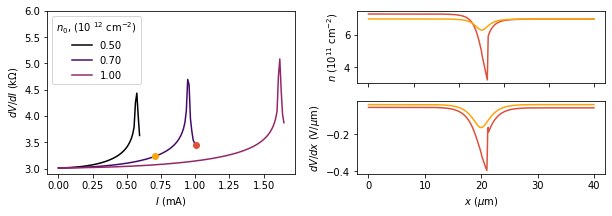

In [42]:
results_dir = "/scratch/alpine/jafa3629/transport-no-rhs-3"
folder = "n0=1.000e+16"
path = f"{results_dir}/{folder}"
cmap = plt.get_cmap('inferno')


#plt.plot(*transport(path))
#plt.show()

I = np.linspace(0.001, 2, 200)

fig = plt.figure(figsize = (10, 3))
gs = mpl.gridspec.GridSpec(2, 2, wspace=0.25, hspace=0.25) # 2x2 grid
ax0 = fig.add_subplot(gs[:, 0]) # first row, first col
ax1 = fig.add_subplot(gs[0, 1]) # first row, second col
ax2 = fig.add_subplot(gs[1, 1]) # full second row
ax0.set_xlabel("$I$ (mA)")
ax0.set_ylabel("$dV/dI$ (k$\Omega$)")
ax1.set_ylabel("$n(x)/n_0$")
ax2.set_ylabel("$V(x)$ (V)")

ax0.plot(I[I<0.6], dVdI(transport("/scratch/alpine/jafa3629/transport-no-rhs-3/n0=5.000e+15"))[1][I<0.6], label = f"{5e15/1e16:.2f}", color = cmap(0))
ax0.plot(I[I<1.0], dVdI(transport("/scratch/alpine/jafa3629/transport-no-rhs-3/n0=7.000e+15"))[1][I<1.0], label = f"{7e15/1e16:.2f}", color = cmap(0.2))
ax0.plot(I[I<1.65], dVdI(transport("/scratch/alpine/jafa3629/transport-no-rhs-3/n0=1.000e+16"))[1][I<1.65], label = f"{1e16/1e16:.2f}", color = cmap(0.4))
ax0.legend(title=r"$n_0$, (10 $^{12}$ cm$^{-2}$)")
ax1.set_ylabel("$n(x)/n_0$")
ax2.set_ylabel("$V(x)$ (V)")
ax1.set_xticklabels([])
ax0.set_ylim(2.9, 6)



data1 = np.load(f"/scratch/alpine/jafa3629/transport-no-rhs-3/n0=7.000e+15/{sorted(os.listdir('/scratch/alpine/jafa3629/transport-no-rhs-3/n0=7.000e+15'))[100]}")
data2 = np.load(f"/scratch/alpine/jafa3629/transport-no-rhs-3/n0=7.000e+15/{sorted(os.listdir('/scratch/alpine/jafa3629/transport-no-rhs-3/n0=7.000e+15'))[70]}")
n1 = data1['background_dens'] * data1['q'][0,:]
n2 = data2['background_dens'] * data2['q'][0,:]



V1 = data1["V"]
x = np.linspace(0, 40, len(V1))
V1 = np.gradient(V1, x)  #V1 = -data1['q'][1,:] / data1['q'][0,:] * (data1['V'][0] - data1['V'][-1]) / 4
V2 = data2["V"]
V2 = np.gradient(V2, x)

ax1.plot(n1/1e15, color = cmap(0.6))
ax1.plot(n2/1e15, color = cmap(0.8))

ax1.set_ylabel("$n$ (10$^{11}$ cm$^{-2}$)")
ax2.set_xlabel("$x$ ($\mu$m)")

ax2.plot(x, V1, color = cmap(0.6))
ax2.plot(x, V2, color = cmap(0.8))
ax2.set_ylabel("$dV/dx$ (V/$\mu$m)")

dVdI1 = dVdI(transport("/scratch/alpine/jafa3629/transport-no-rhs-3/n0=7.000e+15"))[1]
ax0.plot(I[100], dVdI1[100], marker = "o", color = cmap(0.6))
ax0.plot(I[70], dVdI1[70], marker = "o", color = cmap(0.8))


ax0.set_xlabel("$I$ (mA)")
#plt.ylabel("$dV/dI$ (k$\Omega$)")
plt.show()

ax1.plot()

index = -30
fnames = sorted([f for f in os.listdir(path) if ".npz" in f])

#display(fnames)
data = np.load(f"{path}/{fnames[index]}")
q = data['q']
x = data['x']


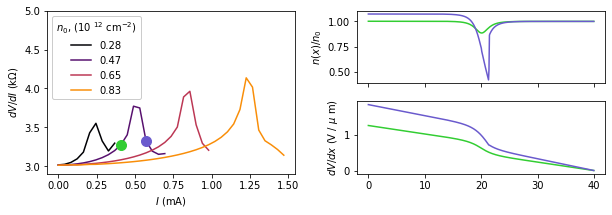

In [33]:
"""
def color_plot(results_dir):
    C = 8.854e-12 * (3.9 + 0.0) / 307e-9
    e = 1.6e-19
    hbar = 1.05e-34
    m = 9.11e-31 * 0.03
    W = 0.342 * 40e-6
    
    
    results = np.zeros((50, 50))
    current = np.zeros_like(results)
    density = np.zeros_like(results)

    count = 0

    for i in range(len(Is)):
        for j in range(len(n0s)):
            V0 = e*n0s[j]/C
            vs = np.sqrt(hbar**2 * np.pi * n0s[j] / m **2 /2)
            
            j0 =  Is[i] / 1000 / W / e / vs / n0s[j]
            print(j0)

            for fn in os.listdir(results_dir):
                if (f"V0={V0:.4f}" in fn) and (f"j={j0:.4f}" in fn and ".npz" in fn):
                    data = np.load(f"{results_dir}/{fn}")
                    results[i,j] = data["V"][0] - data["V"][-1]
                    #results[i, j] = (data["q"][0, 0] - 1) * n0s[j] * np.pi / m * hbar**2 / e
                    if j0 > 0.25:
                        #dVdI[i,j] = 3
                    
                    current[i,j] = Is[i]
                    density[i,j] = n0s[j]
                   
                    
            count += 1
            print(count)

    return results, current, density
"""

def trace(n, I_c, color = "black", markers = False):

    results_dir = "/scratch/alpine/jafa3629/transport-50x50"

    C = 8.854e-12 * (3.9 + 0.0) / 307e-9
    e = 1.6e-19
    hbar = 1.05e-34
    m = 9.11e-31 * 0.03
    W = 0.342 * 40e-6
    
    
    Is = np.linspace(0.000, 2, 50)
    n0s = np.linspace(1e15, 1e16, 50)

    n0 = n0s[n]
    V0 = e*n0/C
    Vs = []
    vs = np.sqrt(hbar**2 * np.pi * n0 / m **2 /2)
    for i in range(len(Is)):
        j0 =  Is[i] / 1000 / W / e / vs / n0
        for fn in os.listdir(results_dir):
            if (f"V0={V0:.4f}" in fn) and (f"j={j0:.4f}" in fn and ".npz" in fn):
                #print(fn)
                data = np.load(f"{results_dir}/{fn}")
                Vs.append(data["V"][0])

    Vs = np.array(Vs)
    #print(Vs)
    dVdI = np.gradient(Vs, Is)

    ax0.plot(Is[Is<I_c], dVdI[Is<I_c], label = f"{n0 / 1e16:.2f}", color = color)


    if markers == True:
        ax0.plot(Is[10], dVdI[10], color = "limegreen", marker = "o", markersize = 10)
        ax0.plot(Is[14], dVdI[14], color = "slateblue", marker = "o", markersize = 10)
    pass
    pass


def V_trace(n,j, color = "black"):
    results_dir = "/scratch/alpine/jafa3629/transport-50x50"

    C = 8.854e-12 * (3.9 + 0.0) / 307e-9
    e = 1.6e-19
    hbar = 1.05e-34
    m = 9.11e-31 * 0.03
    W = 0.342 * 40e-6
    
    
    Is = np.linspace(0.000, 2, 50)
    n0s = np.linspace(1e15, 1e16, 50)

    n0 = n0s[n]
    V0 = e*n0/C
    Vs = []
    vs = np.sqrt(hbar**2 * np.pi * n0 / m **2 /2)
   
    j0 =  Is[j] / 1000 / W / e / vs / n0
    for fn in os.listdir(results_dir):
        if (f"V0={V0:.4f}" in fn) and (f"j={j0:.4f}" in fn and ".npz" in fn):
            #print(fn)
            data = np.load(f"{results_dir}/{fn}")
    ax1.plot(data["x"] * 40, data["q"][0,:], color = color)
    ax2.plot(data["x"] * 40, data["V"], color = color)
            
    
fig = plt.figure(figsize = (10, 3))
gs = mpl.gridspec.GridSpec(2, 2, wspace=0.25, hspace=0.25) # 2x2 grid
ax0 = fig.add_subplot(gs[:, 0]) # first row, first col
ax1 = fig.add_subplot(gs[0, 1]) # first row, second col
ax2 = fig.add_subplot(gs[1, 1]) # full second row
ax0.set_xlabel("$I$ (mA)")
ax0.set_ylabel("$dV/dI$ (k$\Omega$)")
ax1.set_ylabel("$n(x)/n_0$")
ax2.set_ylabel("$dV/dx$ (V / $\mu$ m)")

cmap = plt.get_cmap('inferno')

trace(10, 0.4, color = cmap(0))
trace(20, 0.7, color = cmap(0.25), markers = True)
trace(30, 1, color = cmap(0.5))
trace(40, 1.5, color = cmap(0.75))


V_trace(20, 10, color = "limegreen")
V_trace(20, 14, color = "slateblue")
ax1.set_xticklabels([])

ax0.plot()

ax0.set_ylim(2.9, 5)
ax0.legend(title=r"$n_0$, (10 $^{12}$ cm$^{-2}$)", framealpha=1)






plt.show()
                    
    


            
                    








#results, current, density = color_plot("/scratch/alpine/jafa3629/transport-50x50")

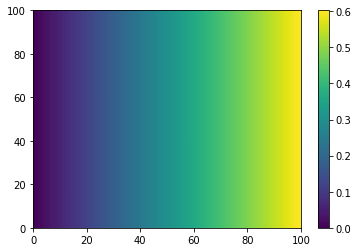

In [21]:
#Is = np.linspace(0.000, 2, 50)
bias_Vs = np.linspace(0.000, 2, 100)
n0s = np.linspace(5e15, 1e16, 100)
results_dir = "/scratch/alpine/jafa3629/transport-100x100-6"

#dVdI = (results[1:,:] - results[:-1, :]) / (Is[1] - Is[0])

V = np.zeros((len(n0s), len(bias_Vs)))
I = np.zeros_like(V)
for i in range(len(bias_Vs)):
    for j in range(len(n0s)):
            for fn in os.listdir(results_dir):
                if (f"n0={n0s[i]:.10e}" in fn) and (f"I={bias_Vs[j]:.10f}" in fn) and (".npz" in fn):
                    data = np.load(f"{results_dir}/{fn}")
                    V[i,j] = data["V"][0]# - data["V"][-1]
                    I[i,j] = data["I"]

plt.pcolormesh(V)
plt.colorbar()





#plt.pcolormesh(Is, n0s, dVdI.T), #vmin = 3, vmax = 5)
#plt.colorbar(label="$dV/dI$ (k$\Omega$)")
#plt.xlabel("$I$ (mA)")
#plt.ylabel("$n_0$ (10$^{12}$ cm$^{-2}$)")

#plt.ylim(0.25e16, 1e16)
#plt.show()


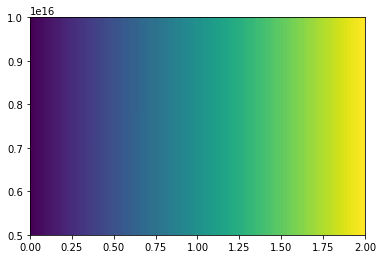

In [22]:
plt.pcolormesh(bias_Vs, n0s, V)


2.0
5000000000000000.0


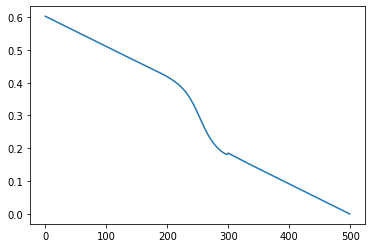

In [20]:
n0 = n0s[0]
I = bias_Vs[-1]
print(I)
print(n0)

for fn in os.listdir(results_dir):
    if (f"n0={n0:.10e}" in fn) and (f"I={I:.10f}" in fn) and (".npz" in fn):
        data = np.load(f"{results_dir}/{fn}")
q = data['q']
plt.plot(q[0,:])

In [3]:
Is = np.linspace(0.000, 2, 50)
n0s = np.linspace(1e15, 1e16, 50)

#dVdI = (results[1:,:] - results[:-1, :]) / (Is[1] - Is[0])
for i in range(dVdI.shape[0]):
    for j in range(dVdI.shape[1]):
        dVdI[i,j] = dVdI[i,j] #* n0s[j] / n0s[0]

plt.pcolormesh(Is, n0s, np.flip(results, -1))
plt.colorbar()
plt.show()


plt.pcolormesh(results)
for fn in os.listdir(results_dir):
    if (f"V0={V0:.4f}" in fn) and (f"j={j0:.4f}" in fn and ".npz" in fn):
        data = np.load(f"{results_dir}/{fn}")
        results[i,j] = data["V"][0] - data["V"][-1]
plt.show()


plt.pcolormesh(Is, n0s, dVdI.T), #vmin = 3, vmax = 5)
plt.colorbar(label="$dV/dI$ (k$\Omega$)")
plt.xlabel("$I$ (mA)")
plt.ylabel("$n_0$ (10$^{12}$ cm$^{-2}$)")

plt.ylim(0.25e16, 1e16)
plt.show()

NameError: name 'dVdI' is not defined